In [29]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

In [30]:
#function to load data

def load_data(data_dir):
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith(".jpg")]
        for f in file_names:
            images.append(data.imread(f))
            labels.append(int(d))
    return images, labels

In [31]:
from skimage import data, io, filters

In [32]:
train_data_directory = "../Cars_task_data/train"
test_data_directory = "../Cars_task_data/test"

images, labels = load_data(train_data_directory)

In [33]:
print(images[0])

[[[209 224 245]
  [209 224 245]
  [209 224 245]
  ..., 
  [126 129 162]
  [129 132 165]
  [132 135 168]]

 [[209 224 245]
  [209 224 245]
  [209 224 245]
  ..., 
  [123 126 157]
  [123 126 157]
  [123 126 157]]

 [[209 224 245]
  [209 224 245]
  [209 224 245]
  ..., 
  [120 121 152]
  [118 119 150]
  [117 118 149]]

 ..., 
 [[182 169 161]
  [193 180 172]
  [200 187 179]
  ..., 
  [204 197 189]
  [174 167 159]
  [175 168 160]]

 [[198 185 177]
  [201 188 180]
  [204 191 183]
  ..., 
  [203 196 188]
  [176 169 161]
  [169 162 154]]

 [[195 182 174]
  [188 175 167]
  [190 177 169]
  ..., 
  [212 205 197]
  [223 216 208]
  [214 207 199]]]


In [35]:
print(len(set(labels)))

4


In [36]:
plt.hist(labels,10)

(array([ 2250.,     0.,     0.,  2250.,     0.,     0.,  2250.,     0.,
            0.,  2250.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

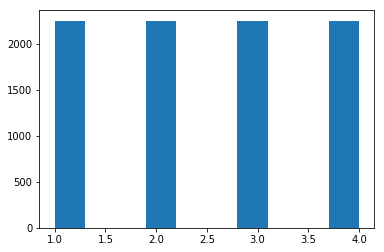

In [37]:
plt.show()

In [38]:
car_images = [1234,1360,5555,3460]

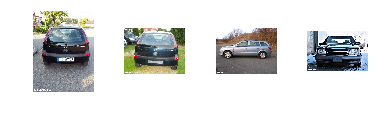

In [39]:
for i in range(len(car_images)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[car_images[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

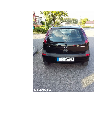

shape: (720, 540, 3), min: 0, max: 255


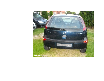

shape: (720, 960, 3), min: 0, max: 255


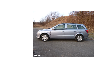

shape: (720, 960, 3), min: 0, max: 255


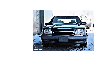

shape: (715, 1080, 3), min: 0, max: 255


In [40]:
for i in range(len(car_images)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[car_images[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[car_images[i]].shape, 
                                                  images[car_images[i]].min(), 
                                                  images[car_images[i]].max()))

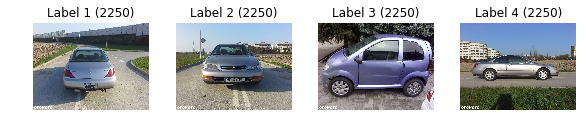

In [41]:
# Show Images from each unique label
unique_labels = set(labels)

plt.figure(figsize=(20, 15))

i = 1

for label in unique_labels:
    image = images[labels.index(label)] 
    plt.subplot(8, 8, i)
    plt.axis('off')
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    i += 1 
    plt.imshow(image)
    
plt.show()

In [42]:
from skimage import transform

#convert images to 28*28 sized array 
images28 = [transform.resize(image,(28,28)) for image in images]

/Users/hardikthaker/.virtualenvs/cv/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


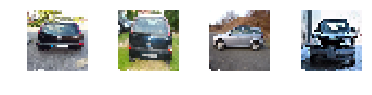

In [43]:
#showing some car images
for i in range(len(car_images)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[car_images[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

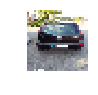

shape: (28, 28, 3), min: 0.017527010804320207, max: 1.0


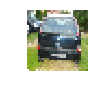

shape: (28, 28, 3), min: 0.02184873949579736, max: 1.0


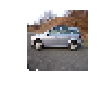

shape: (28, 28, 3), min: 0.02745098039215759, max: 1.0


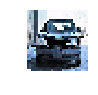

shape: (28, 28, 3), min: 0.0, max: 1.0


In [44]:
#showing with dimensions
for i in range(len(car_images)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[car_images[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images28[car_images[i]].shape, 
                                                  images28[car_images[i]].min(), 
                                                  images28[car_images[i]].max()))

In [45]:
from skimage.color import rgb2gray
#gray conversion
images28 = np.array(images28)
images28 = rgb2gray(images28)

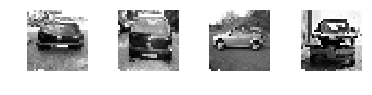

In [46]:
for i in range(len(car_images)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[car_images[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [47]:
# Initialize placeholders 
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Flatten the input data
images_flat = tf.contrib.layers.flatten(x)

# Fully connected layer 
logits = tf.contrib.layers.fully_connected(images_flat, 5, tf.nn.relu)

# Define a loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, 
                                                                    logits = logits))
# Define an optimizer 
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

# Define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [21]:
print("images_flat:",images_flat)

images_flat: Tensor("Flatten/Reshape:0", shape=(?, 196), dtype=float32)


In [22]:
print("loss:",loss)

loss: Tensor("Mean:0", shape=(), dtype=float32)


In [23]:
print("logits:",logits)

logits: Tensor("fully_connected/Relu:0", shape=(?, 5), dtype=float32)


In [24]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [25]:
#this is just a temp run.
tf.set_random_seed(50)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(151):
        _, loss_value = sess.run([train_op, loss], feed_dict={x: images28, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss)

Loss:  Tensor("Mean:0", shape=(), dtype=float32)
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
Loss:  Tensor("Mean:0", shape=(), dtype=float32)


In [48]:
tf.set_random_seed(1234)
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(251):
        print('EPOCH', i)
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images28, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss)
        print('DONE WITH EPOCH')

EPOCH 0
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1
DONE WITH EPOCH
EPOCH 2
DONE WITH EPOCH
EPOCH 3
DONE WITH EPOCH
EPOCH 4
DONE WITH EPOCH
EPOCH 5
DONE WITH EPOCH
EPOCH 6
DONE WITH EPOCH
EPOCH 7
DONE WITH EPOCH
EPOCH 8
DONE WITH EPOCH
EPOCH 9
DONE WITH EPOCH
EPOCH 10
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 11
DONE WITH EPOCH
EPOCH 12
DONE WITH EPOCH
EPOCH 13
DONE WITH EPOCH
EPOCH 14
DONE WITH EPOCH
EPOCH 15
DONE WITH EPOCH
EPOCH 16
DONE WITH EPOCH
EPOCH 17
DONE WITH EPOCH
EPOCH 18
DONE WITH EPOCH
EPOCH 19
DONE WITH EPOCH
EPOCH 20
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 21
DONE WITH EPOCH
EPOCH 22
DONE WITH EPOCH
EPOCH 23
DONE WITH EPOCH
EPOCH 24
DONE WITH EPOCH
EPOCH 25
DONE WITH EPOCH
EPOCH 26
DONE WITH EPOCH
EPOCH 27
DONE WITH EPOCH
EPOCH 28
DONE WITH EPOCH
EPOCH 29
DONE WITH EPOCH
EPOCH 30
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 31
DONE WITH EPOCH
EPOCH 

[3, 2, 4, 1, 1, 3, 1, 3, 2, 2]
[4 2 4 1 1 3 1 3 4 4]


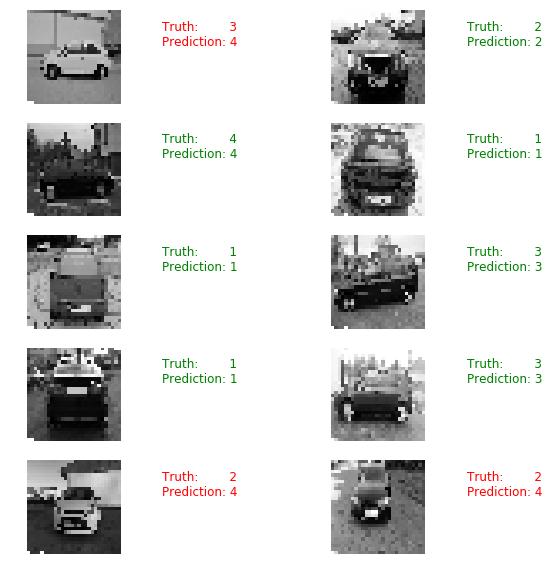

In [49]:
import random

# Pick 10 random images
sample_indexes = random.sample(range(len(images28)), 10)
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "correct_pred" operation
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i],  cmap="gray")

plt.show()

# class '1': back
# class '2': front
# class '3': leftside
# class '4': rightside

In [50]:
# Load the test data
test_images, test_labels = load_data(test_data_directory)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray
test_images28 = rgb2gray(np.array(test_images28))

# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

/Users/hardikthaker/.virtualenvs/cv/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Accuracy: 0.686
